In [6]:
import pandas as pd

Handling Outliers:

Outliers are data points that significantly differ from other observations in the dataset. They can distort analysis results, so it's important to identify and handle them properly.

In [7]:
df = pd.read_csv(r"C:\Users\ayush\OneDrive\Desktop\coding\100dy for ml\Day1\train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 1: Identifying Outliers Uisng Graphs

    Using Visualizations (Box Plot, Scatter Plot)

        Box Plot: Displays the distribution of data and highlights outliers outside the "whiskers" of the plot.

        Scatter Plot: Visualizes the relationship between two variables, and outliers may appear as isolated points.

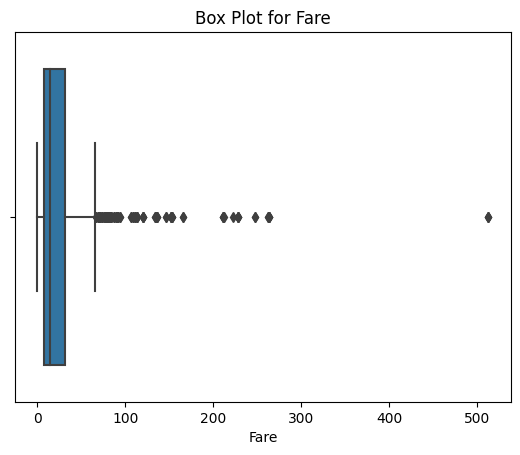

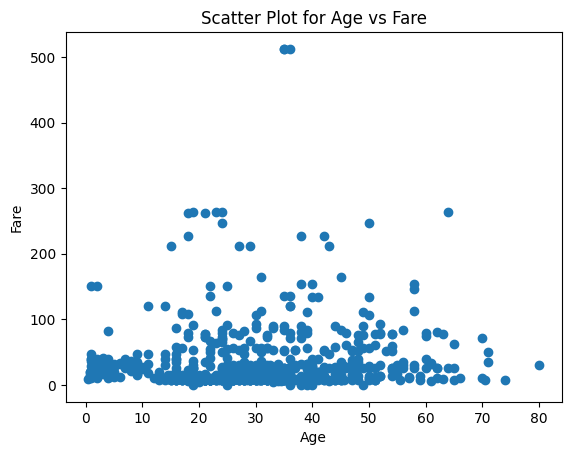

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot to identify outliers in the 'Fare' column
sns.boxplot(x=df['Fare'])
plt.title('Box Plot for Fare')
plt.show()

# Scatter plot to visualize outliers between 'Fare' and 'Age'
plt.scatter(df['Age'], df['Fare'])
plt.title('Scatter Plot for Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

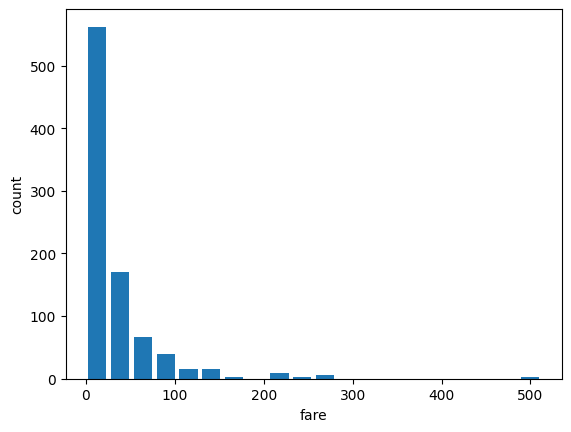

In [8]:
plt.hist(df.Fare,bins=20,rwidth=0.8)
plt.xlabel("fare")
plt.ylabel("count")
plt.show()

IDENTIFYING THE OUTLIERS USING STASTICAL METHOD


In [9]:
from scipy import stats
df['Fare_Zscore'] = stats.zscore(df['Fare'])

# Identify outliers with Z-score > 3 or < -3
outliers = df[(df['Fare_Zscore'] > 3) | (df['Fare_Zscore'] < -3)]
print(outliers[['Fare', 'Fare_Zscore']])


         Fare  Fare_Zscore
27   263.0000     4.647001
88   263.0000     4.647001
118  247.5208     4.335332
258  512.3292     9.667167
299  247.5208     4.335332
311  262.3750     4.634417
341  263.0000     4.647001
377  211.5000     3.610065
380  227.5250     3.932723
438  263.0000     4.647001
527  221.7792     3.817033
557  227.5250     3.932723
679  512.3292     9.667167
689  211.3375     3.606793
700  227.5250     3.932723
716  227.5250     3.932723
730  211.3375     3.606793
737  512.3292     9.667167
742  262.3750     4.634417
779  211.3375     3.606793


In [11]:
df.loc[0,:]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Fare_Zscore                  -0.502445
Name: 0, dtype: object

In [15]:
#lets calculate mean using mean function
df['Fare'].mean()


32.204207968574636

In [16]:
df['Fare'].std()

49.6934285971809

WE CAN CALCULATE Z_ZCORE MANUALLY TO VERIFY OUR OUTPUT
z_score = (Xi - mean)/σ
lets calculate for our first row as outlier 27
xi= 263.000
mean = 32.204208
std. deviation σ = 49.6934285
z_score = (263.000 - 32.204208)/49.6934285 
z_score = 4.644392608169509 
Hence we can see its more than 3 so it detects as outliers

IDENTYFING THE OUTLIER USING IQR

In [8]:
column = 'Age'

# Calculate Q1 and Q3
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Print the outliers
print(outliers)

     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   male  66.0    